In [1]:
# Libraries import

import warnings
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
warnings.filterwarnings('ignore')

In [2]:
# Selecting folder

data_dir = os.getcwd()[0:-10] + "\\data\\raw"
files = os.listdir(data_dir)
files.pop(0)

'.gitignore'

In [3]:
# Loading the data (change 'files' index to modify meteorological station)

df = pd.read_excel(data_dir + "\\" + files[0], header=1)

In [4]:
# Standardizing variable names, defining date index and adding new time variables

df.columns = ['date', 'wind speed', 't max', 't min', 'humidity max', 'humidity min', 'vpd', 'evaporation', 'solar radiation']
aux = df['date']
df = df.set_index('date')
df['year'] = df.index.year
df['month'] = df.index.month
df['weekday name'] = df.index.weekday_name

df

,wind speed,t max,t min,humidity max,humidity min,vpd,evaporation,solar radiation,year,month,weekday name
date,,,,,,,,,,,
1998-01-01,1.2,32.7,22.0,35,19,2.862456,4.75,20.8,1998,1,Thursday
1998-01-02,2.6,29.0,21.6,43,28,2.177387,5.55,16.5,1998,1,Friday
1998-01-03,1.7,33.8,20.4,35,16,2.988294,5.36,18.3,1998,1,Saturday
1998-01-04,2.1,34.0,22.2,43,22,2.837267,6.13,21.9,1998,1,Sunday
1998-01-05,1.7,34.4,22.4,26,13,3.368273,5.64,19.8,1998,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,1.8,29.4,18.4,43,22,2.201886,4.99,19.3,2012,12,Thursday
2012-12-28,1.7,32.4,18.5,42,18,2.611593,5.37,21.4,2012,12,Friday
2012-12-29,1.8,31.5,17.0,39,16,2.532276,5.45,21.7,2012,12,Saturday


In [5]:
# Data split

X_train, X_test = df.loc['1998':'2008'], df.loc['2009':'2012']
y_train, y_test = X_train['solar radiation'], X_test['solar radiation']
X_train = X_train.drop(['year', 'month', 'weekday name', 'solar radiation'], axis=1)
X_test = X_test.drop(['year', 'month', 'weekday name', 'solar radiation'], axis=1)

In [6]:
X_train

,wind speed,t max,t min,humidity max,humidity min,vpd,evaporation
date,,,,,,,
1998-01-01,1.2,32.7,22.0,35,19,2.862456,4.75
1998-01-02,2.6,29.0,21.6,43,28,2.177387,5.55
1998-01-03,1.7,33.8,20.4,35,16,2.988294,5.36
1998-01-04,2.1,34.0,22.2,43,22,2.837267,6.13
1998-01-05,1.7,34.4,22.4,26,13,3.368273,5.64
...,...,...,...,...,...,...,...
2008-12-27,1.6,33.0,20.0,37,17,2.824070,5.24
2008-12-28,1.6,34.0,20.6,35,16,3.022719,5.38
2008-12-29,1.9,34.6,20.2,32,14,3.169722,5.99


### A) Multiple Linear Regression Model Using The Original Variables

In [7]:
# Fitting multiple linear regression model to the training set

regressor_orig = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
regressor_orig.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# Predicting the test set results

y_pred_orig = regressor_orig.predict(X_test)

In [9]:
# Calculation of metrics

print("MSE:", metrics.mean_squared_error(y_test, y_pred_orig, squared=True))
print("RMSE:", metrics.mean_squared_error(y_test, y_pred_orig, squared=False))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred_orig))
print("R²:", metrics.r2_score(y_test, y_pred_orig))
print("R²_adj:", (1 - (1 - metrics.r2_score(y_test, y_pred_orig)) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1))))

MSE: 2.3362010790451495
RMSE: 1.5284636335370068
MAE: 1.1386623663068576
R²: 0.8238964157730324
R²_adj: 0.8235890030324866


In [10]:
# Estimated coefficients and independent term values

print("Coefficients:", regressor_orig.coef_)
print("Intercept:", regressor_orig.intercept_)

Coefficients: [-4.18269064  0.24117324 -0.40734441 -0.05341603  0.09943898 -2.20061451
  4.69147544]
Intercept: 8.556249387249537


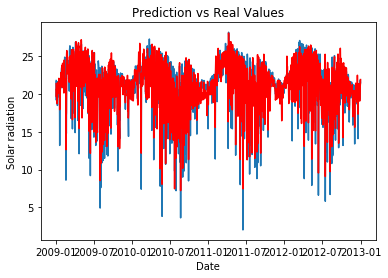

In [11]:
y_pred_orig_df = pd.DataFrame(data=y_pred_orig, index=aux[4018:])

plt.figure()
plt.plot(y_test)
plt.plot(y_pred_orig_df, color='red')
plt.title('Prediction vs Real Values')
plt.xlabel('Date')
plt.ylabel('Solar radiation')
plt.show()

### B) Multiple Linear Regression Model Adding Polynomial Features

In [12]:
# Creating polynomial features (degree = 2, interaction_only=False)

poly_train = PolynomialFeatures(2, interaction_only=False)
poly_test = PolynomialFeatures(2, interaction_only=False)
X_train_pol = poly_train.fit_transform(X_train)
X_test_pol = poly_test.fit_transform(X_test)

In [13]:
# Fitting multiple linear regression model to the training set

regressor_pol = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
regressor_pol.fit(X_train_pol, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# Predicting the test set results

y_pred_pol = regressor_pol.predict(X_test_pol)

In [15]:
# Calculation of metrics

print("MSE:", metrics.mean_squared_error(y_test, y_pred_pol, squared=True))
print("RMSE:", metrics.mean_squared_error(y_test, y_pred_pol, squared=False))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred_pol))
print("R²:", metrics.r2_score(y_test, y_pred_pol))
print("R²_adj:", (1 - (1 - metrics.r2_score(y_test, y_pred_pol)) * ((X_train_pol.shape[0] - 1) / (X_train_pol.shape[0] - X_train_pol.shape[1] - 1))))

MSE: 0.32675668822441184
RMSE: 0.5716263536825535
MAE: 0.39916434808820767
R²: 0.975368976376823
R²_adj: 0.975146239162446


In [16]:
# Estimated coefficients and independent term values

print("Coefficients:", regressor_pol.coef_)
print("Intercept:", regressor_pol.intercept_)

Coefficients: [-1.50937775e-10 -2.01259117e+01 -2.53753894e+00  1.55872768e+00
  4.62076539e-01 -3.82792512e-01 -1.21792214e+01  1.65938173e+01
 -3.85914213e-02  1.86690859e-01 -2.23876467e-01  1.65494029e-02
  2.19717332e-01 -3.16586220e-01  7.43579822e-01  1.60746086e-01
 -8.33897387e-02 -1.92248191e-02 -2.04799868e-02 -8.03691075e-01
 -3.96289593e-01 -5.52602795e-02 -1.06787793e-02  5.12551459e-02
  8.89570176e-01  1.91524745e-01 -1.84090700e-03  6.12644602e-03
  1.25697410e-02  4.05269231e-02 -7.05486044e-03 -2.37320605e-02
 -1.08537394e-01  5.69238310e-01  4.66763044e-01 -1.65273541e-01]
Intercept: 23.254133462997313


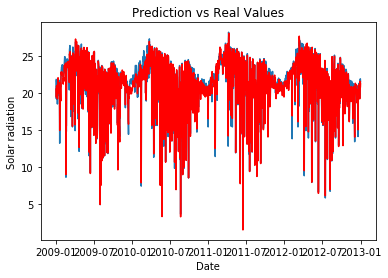

In [17]:
y_pred_pol_df = pd.DataFrame(data=y_pred_pol, index=aux[4018:])

plt.figure()
plt.plot(y_test)
plt.plot(y_pred_pol_df, color='red')
plt.title('Prediction vs Real Values')
plt.xlabel('Date')
plt.ylabel('Solar radiation')
plt.show()

In [18]:
# Insert KFold + Pipeline procedure